# Internship at Ganil, Caen, France

SAMPLE OF CODE USED TO ANALYZE ELECTRON MOTION IN ECRIS FROM TRAPCAD SIMULATION

INTERNSHIP TEAM: CHRISTINA KARAGIANNI, DEBORAH SELEMON

Analysis for simulation with 9GHz, 1000ns, 500W

Contact authors for more details on the study.

In [42]:
import numpy as np
import csv
from matplotlib import pyplot as plt
import pylab as pl
from matplotlib import collections  as mc
import pandas as pd 
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from scipy.optimize import curve_fit
import scipy.stats as stats

In [43]:
# Loading the file 

X_start=[]
Y_start=[]
Z_start=[]
E_total_start=[]
E_perp_start=[]
E_par_start=[]
X_stop=[]
Y_stop=[]
Z_stop=[]
E_total_stop=[]
E_perp_stop=[]
E_par_stop=[]
Time=[]


# X,Y,Z in cm
# E in eV
# time in ns

freq=9;
t=1000;
power=500;

with open("InputFile_NonLost_%iGHz_%ins_%iW.txt"%(freq,t,power)) as csvfile:
    DATA = csv.reader(csvfile, delimiter=',')
    for row in DATA:
        X_start.append((row[0]))
        Y_start.append((row[1]))
        Z_start.append((row[2]))
        E_total_start.append((row[3]))
        E_perp_start.append((row[4]))
        E_par_start.append((row[5]))
        X_stop.append((row[6]))
        Y_stop.append((row[7]))
        Z_stop.append((row[8]))
        E_total_stop.append((row[9]))
        E_perp_stop.append((row[10]))
        E_par_stop.append((row[11]))
        Time.append((row[12]))

In [44]:
# Removing strange character - "-1.#IND00"
for n in range(length):
    if E_par_stop[n] == '  -1.#IND00':
        X_start[n] =Y_start[n] =Z_start[n] =E_total_start[n] =E_perp_start[n] =E_par_start[n] =X_stop[n] =Y_stop[n] =Z_stop[n] =E_total_stop[n] =E_perp_stop[n] =E_par_stop[n] =Time[n] = 0

        
# Converting all items in lists to floats
X_START=[]
Y_START=[]
Z_START=[]
E_TOTAL_START=[]
E_PERP_START=[]
E_PAR_START=[]
X_STOP=[]
Y_STOP=[]
Z_STOP=[]
E_TOTAL_STOP=[]
E_PERP_STOP=[]
E_PAR_STOP=[]
TIME=[]

for item in X_start:
    X_START.append(float(item))
for item in Y_start:
    Y_START.append(float(item))
for item in Z_start:
    Z_START.append(float(item))
for item in E_total_start:
    E_TOTAL_START.append(float(item))
for item in E_perp_start:
    E_PERP_START.append(float(item))
for item in E_par_start:
    E_PAR_START.append(float(item))
for item in X_stop:
    X_STOP.append(float(item))
for item in Y_stop:
    Y_STOP.append(float(item))
for item in Z_stop:
    Z_STOP.append(float(item))
for item in E_total_stop:
    E_TOTAL_STOP.append(float(item))
for item in E_perp_stop:
    E_PERP_STOP.append(float(item))
for item in E_par_stop:
    E_PAR_STOP.append(float(item))
for item in Time:
    TIME.append(float(item))

In [45]:
#DEFINING R
#R_START = np.zeros(length) #doesn't give as a list - non-iterable
R_START = [0]*length #gives as a list - iterable
for i in range(length):
    R_START[i]=np.sqrt(((X_START[i])**2) + ((Y_START[i])**2))
#R_STOP = np.zeros(length)
R_STOP = [0]*length
for i in range(length):
    R_STOP[i]=np.sqrt(((X_STOP[i])**2) + ((Y_STOP[i])**2))

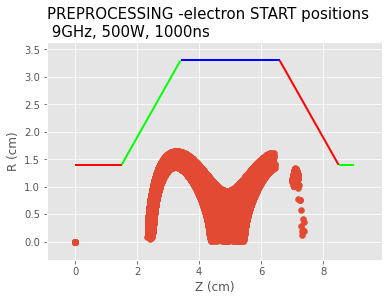

In [57]:
#Plotting (R vs Z) initial electron positions before processing

lines = [[(0, 1.4), (1.5, 1.4)], [(1.5, 1.4), (3.4,3.3)], [(3.4,3.3), (6.6,3.3)],[(6.6,3.3),(8.5,1.4)],[(8.5,1.4),(9.0,1.4)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(Z_START,R_START)
plt.xlabel('Z (cm)')
plt.ylabel('R (cm)')
plt.title('PREPROCESSING -electron START positions \n %iGHz, %iW, %ins'%(freq,power,t),fontsize=15,loc='left')
plt.show()

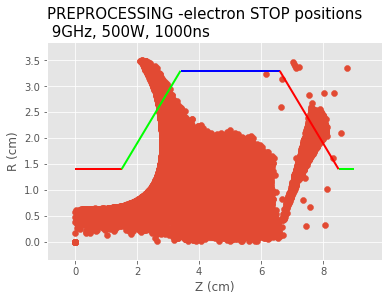

In [50]:
# Plot final positions before selection
lines = [[(0, 1.4), (1.5, 1.4)], [(1.5, 1.4), (3.4,3.3)], [(3.4,3.3), (6.6,3.3)],[(6.6,3.3),(8.5,1.4)],[(8.5,1.4),(9.0,1.4)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(Z_STOP,R_STOP)
plt.xlabel('Z (cm)')
plt.ylabel('R (cm)')
plt.title('PREPROCESSING -electron STOP positions\n %iGHz, %iW, %ins'%(freq,power,t),fontsize=15,loc='left')
plt.show()

In [51]:
#Removing Hatched Zones according to defined geometry
for i in range(len(Z_START)):
#Removing Rectangular Hatched Zones
    if 0<= Z_START[i] <= 1.5 and R_START[i] >= 1.4:
        X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] =TIME[i]= 60000000
    if 3.4<=Z_START[i]<=6.6 and R_START[i]>=3.3:
        X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i]=TIME[i] = 60000000
    if 8.5<= Z_START[i] <= 9.0 and R_START[i] >= 1.4:
        X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] =TIME[i]= 60000000
    if 0<= Z_STOP[i] <= 1.5 and R_STOP[i] >= 1.4:
        X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] =X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=TIME[i]= 60000000
    if 3.4<=Z_STOP[i]<=6.6 and R_STOP[i]>=3.3:
        X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] = X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=TIME[i]=60000000
    if 8.5<= Z_STOP[i] <= 9.0 and R_STOP[i] >= 1.4:
        X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] = X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=TIME[i]=60000000
#Removing Triangular Hatched Zones
    if 1.5<= Z_START[i] <= 3.4 and  R_START[i] >= Z_START[i] - 0.1:
        X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i]=TIME[i]=60000000
    if 1.5<= Z_STOP[i] <= 3.4 and R_STOP[i] >= Z_STOP[i] - 0.1:
        X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] =X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=TIME[i]= 60000000
    if 6.6<= Z_START[i] <= 8.5 and R_START[i]>=1.4 and R_START[i] >= -Z_START[i] +9.9:
        X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i]=TIME[i]=60000000
    if 6.6<= Z_STOP[i] <= 8.5 and R_STOP[i]>=1.4 and R_STOP[i] >= -Z_STOP[i] +9.9:
        X_STOP[i]=Y_STOP[i]=Z_STOP[i] = R_STOP[i]=E_PAR_STOP[i]=E_PERP_STOP[i]=E_TOTAL_STOP[i] =X_START[i]=Y_START[i]=Z_START[i] = R_START[i] = E_PAR_START[i]=E_PERP_START[i]=E_TOTAL_START[i]=TIME[i]= 60000000

In [52]:
# deleting 60000000
X_START=[i for i in X_START if i!=60000000]
Y_START=[i for i in Y_START if i!=60000000]
Z_START=[i for i in Z_START if i!=60000000]
R_START=list(R_START)
R_START=[i for i in R_START if i!=60000000]
E_PAR_START=[i for i in E_PAR_START if i!=60000000]
E_PERP_START=[i for i in E_PERP_START if i!=60000000]
E_TOTAL_START=[i for i in E_TOTAL_START if i!=60000000]
X_STOP=[i for i in X_STOP if i!=60000000]
Y_STOP=[i for i in Y_STOP if i!=60000000]
Z_STOP=[i for i in Z_STOP if i!=60000000]
R_STOP=list(R_STOP)
R_STOP=[i for i in R_STOP if i!=60000000]
E_PAR_STOP=[i for i in E_PAR_STOP if i!=60000000]
E_PERP_STOP=[i for i in E_PERP_STOP if i!=60000000]
E_TOTAL_STOP=[i for i in E_TOTAL_STOP if i!=60000000]
TIME=[i for i in TIME if i!=60000000]

#print(len(X_START),len(Y_START),len(E_TOTAL_START),len(E_PERP_START),len(E_PAR_START),len(X_STOP),len(Y_STOP),len(Z_STOP),len(E_TOTAL_STOP),len(E_PERP_STOP),len(E_PAR_STOP),len(TIME))

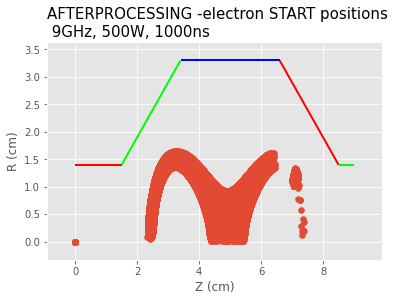

In [58]:
# Plot initial positions after selection
lines = [[(0, 1.4), (1.5, 1.4)], [(1.5, 1.4), (3.4,3.3)], [(3.4,3.3), (6.6,3.3)],[(6.6,3.3),(8.5,1.4)],[(8.5,1.4),(9.0,1.4)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(Z_START,R_START)
plt.xlabel('Z (cm)')
plt.ylabel('R (cm)')
plt.title('AFTERPROCESSING -electron START positions \n %iGHz, %iW, %ins'%(freq,power,t),fontsize=15,loc='left')
plt.show()

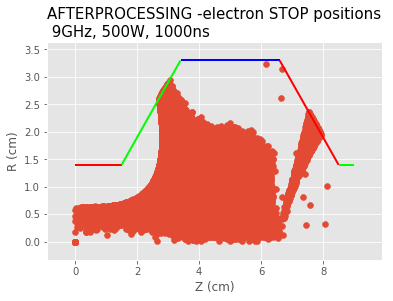

In [60]:
# Plot final positions after selection
lines = [[(0, 1.4), (1.5, 1.4)], [(1.5, 1.4), (3.4,3.3)], [(3.4,3.3), (6.6,3.3)],[(6.6,3.3),(8.5,1.4)],[(8.5,1.4),(9.0,1.4)]]
c = np.array([(1, 0, 0, 1), (0, 1, 0, 1), (0, 0, 1, 1)])
lc = mc.LineCollection(lines, colors=c, linewidths=2)
fig, ax = pl.subplots()
ax.add_collection(lc)
ax.autoscale()
ax.margins(0.1)
plt.scatter(Z_STOP,R_STOP)
plt.xlabel('Z (cm)')
plt.ylabel('R (cm)')
plt.title('AFTERPROCESSING -electron STOP positions \n %iGHz, %iW, %ins'%(freq,power,t),fontsize=15,loc='left')
plt.savefig('Stop_after.jpg')
plt.show()

In [65]:
bin_number=int(np.sqrt(len(E_TOTAL_START)))
En=np.mean(E_TOTAL_STOP)

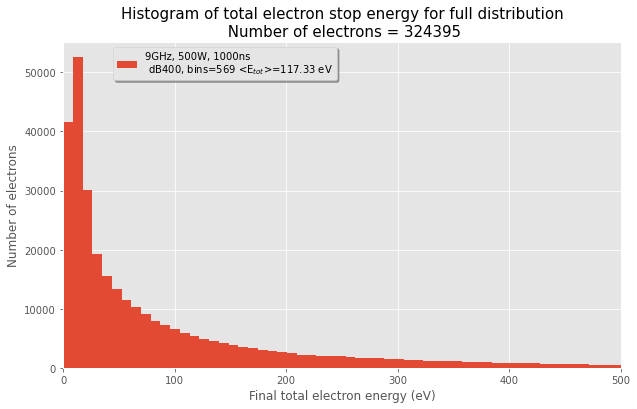

In [67]:
#Histogram for the whole electrons of the non-lost file (real source geometry) final positions
fig15 = plt.figure(figsize=(10,6))
axes = plt.gca()
axes.set_xlim([0,500])
plt.hist(E_TOTAL_STOP, bins = bin_number, label='%iGHz, %iW, %ins \n bins=%i <E$_{tot}$>=%.2f eV'%(freq,power,t,bin_number,En))
plt.style.use('ggplot')
plt.xlabel('Final total electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('Histogram of total electron stop energy for full distribution\n Number of electrons = %i' % len(E_TOTAL_STOP),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.show()

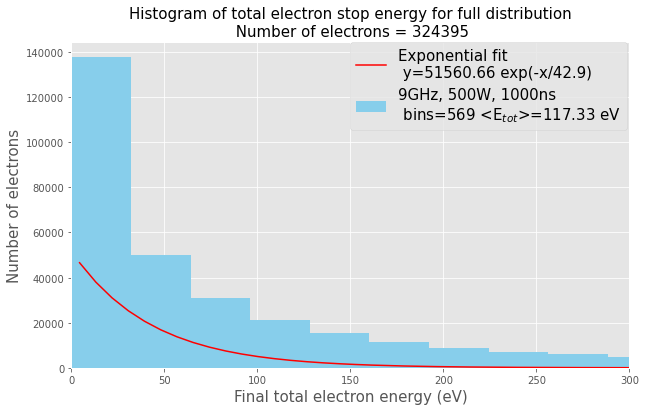

A= 51560.66
kT= 42.9


In [72]:
#Exponential y=Aexp(-E/kT)
def fitting_equation(xdata,a,b):
    y=a*np.exp(-xdata/b) #a=A and b=kT
    return y

a=np.histogram(E_TOTAL_STOP, bins = bin_number)

energy=ydata=a[0]
bin_edges=a[1]

# the average value of two values
bin_centers=xdata=list()
for i in range(len(energy)):
    bin_center=(bin_edges[i]+bin_edges[i+1])/2
    bin_centers.append(bin_center)
    
fitting_parameters,cov_matrix=scipy.optimize.curve_fit(fitting_equation,bin_centers,energy); # without any initial guess 
#print(fitting_parameters)
y_output=fitting_equation(np.array(bin_centers),a=fitting_parameters[0],b=fitting_parameters[1]);

A=round(fitting_parameters[0],2)
kT=round(fitting_parameters[1],2)

fig2 = plt.figure(figsize=(10,6))
axes = plt.gca()
axes.set_xlim([0,300])
#plt.plot(bin_centers,energy,'.')
plt.hist(E_TOTAL_STOP, bins = n_bins, color = "skyblue", label='%iGHz, %iW, %ins \n bins=%i <E$_{tot}$>=%.2f eV'%(freq,power,t,bin_number,En))
plt.plot(bin_centers,y_output,color="red",label='Exponential fit \n y=%s exp(-x/%s)'%(A,kT))
plt.xlabel('Final total electron energy (eV)',fontsize=15)
plt.ylabel('Number of electrons',fontsize=15)
plt.title('Histogram of total electron stop energy for full distribution\n Number of electrons = %i' % len(E_TOTAL_STOP),fontsize=15)
plt.legend(bbox_to_anchor=(0.5, 1.00), loc='upper left', borderaxespad=0.,fontsize=15)
plt.show()

print('A=',A)
print('kT=',kT)

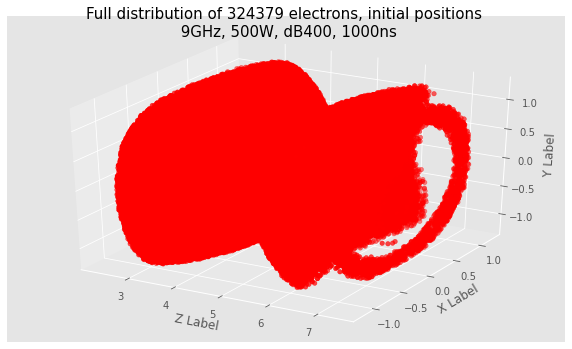

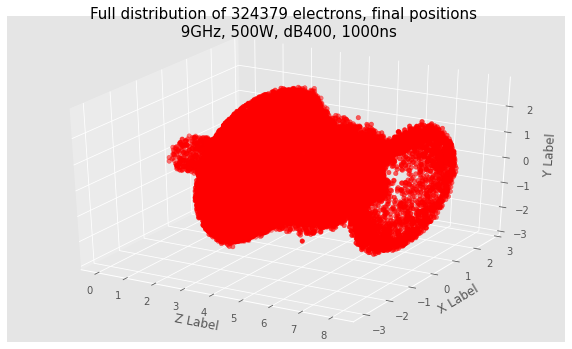

In [22]:
#3D scatter plots for full distributions initial and final positions
fig28 = plt.figure(figsize=(10,6))
ax = fig28.add_subplot(111, projection='3d')
ax.scatter( Z_START, X_START, Y_START, c='r', marker='o')
ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Y Label')
plt.title('Full distribution of %d electrons, initial positions \n 9GHz, 500W, dB400, 1000ns'% len(X_START),fontsize=15)
fig28.savefig("full_distribution_initial.jpg", dpi=150)
plt.show()

fig29 = plt.figure(figsize=(10,6))
ax = fig29.add_subplot(111, projection='3d')

ax.scatter( Z_STOP, X_STOP, Y_STOP, c='r', marker='o')

ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Y Label')
plt.title('Full distribution of %d electrons, final positions \n 9GHz, 500W, dB400, 1000ns'% len(X_START),fontsize=15)
fig29.savefig("full_distribution_final.jpg", dpi=150)
plt.show()

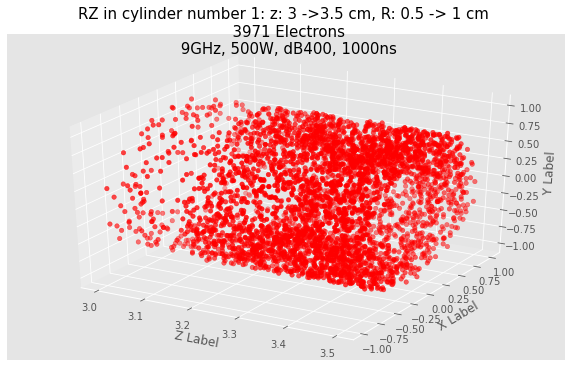

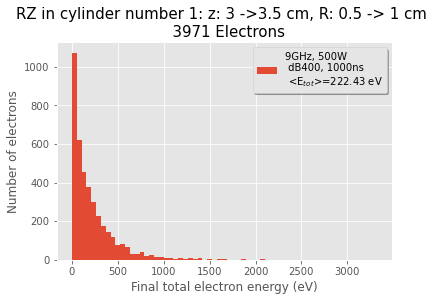

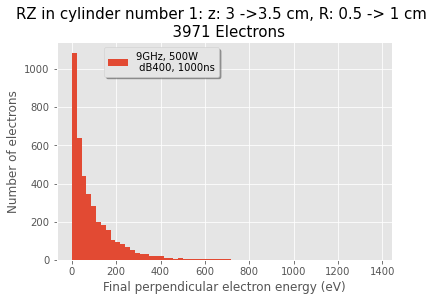

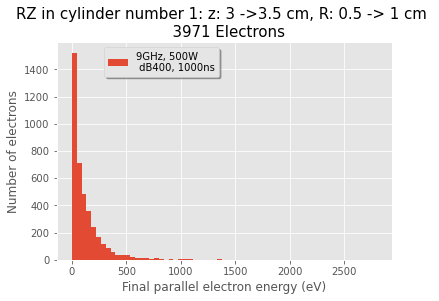

In [23]:
# RZ in number 1 cylinder: 
# z: 3 -> 3.5 cm
# R: 0.5 -> 1 cm 

x_cube=[]
y_cube=[]
z_cube=[]
r_cube=[]
e_total_cube=[]
e_perp_cube=[]
e_par_cube=[]
time_cube=[]

for i in range(len(Z_STOP)):
    if 3<=Z_STOP[i]<=3.5 and 0.5<=R_STOP[i]<=1:
        x_cube.append((X_STOP[i]))
        y_cube.append((Y_STOP[i]))
        z_cube.append((Z_STOP[i]))
        r_cube.append((R_STOP[i]))
        e_total_cube.append((E_TOTAL_STOP[i]))
        e_perp_cube.append((E_PERP_STOP[i]))
        e_par_cube.append((E_PAR_STOP[i]))
        
#print(len(x_cube),len(y_cube))

#print(len(x_cube),len(y_cube))
mean = float(np.mean(e_total_cube))
#print(mean)
mean1=round(mean, 2)
#print(mean1)

fig30 = plt.figure(figsize=(10,6))
ax = fig30.add_subplot(111, projection='3d')
ax.scatter(z_cube,x_cube, y_cube,  c='r', marker='o')
ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Y Label')
plt.title('RZ in cylinder number 1: z: 3 ->3.5 cm, R: 0.5 -> 1 cm \n  %d Electrons \n 9GHz, 500W, dB400, 1000ns' % len(x_cube),fontsize=15)
plt.savefig('RZ in number 1_cylinder.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_total_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000ns \n <E$_{tot}$>=%s eV'%mean1)
plt.style.use('ggplot')
plt.xlabel('Final total electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 1: z: 3 ->3.5 cm, R: 0.5 -> 1 cm \n  %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 1_histo.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_perp_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000ns')
plt.style.use('ggplot')
plt.xlabel('Final perpendicular electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 1: z: 3 ->3.5 cm, R: 0.5 -> 1 cm \n  %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 1_histo_perp.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_par_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000ns')
#plt.style.use('ggplot')
plt.xlabel('Final parallel electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 1: z: 3 ->3.5 cm, R: 0.5 -> 1 cm \n  %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 1_histo_par.jpg')
plt.show()

#print(np.mean(e_total_cube))

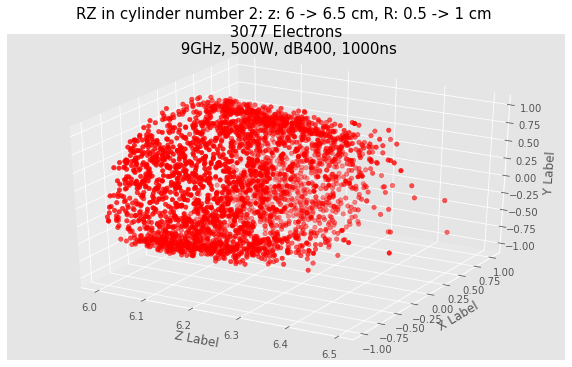

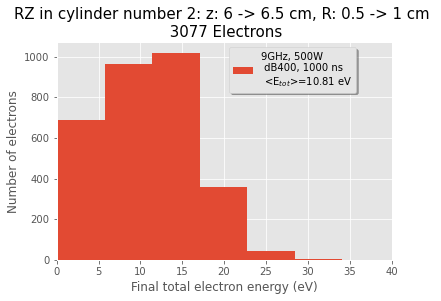

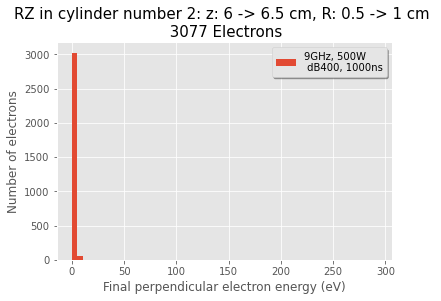

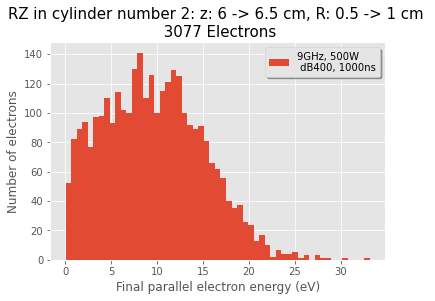

In [24]:
# RZ in number 2 cylinder: 
# z: 6 -> 6.5 cm
# R: 0.5 -> 1 cm

x_cube=[]
y_cube=[]
z_cube=[]
r_cube=[]
e_total_cube=[]
e_perp_cube=[]
e_par_cube=[]
time_cube=[]

for i in range(len(Z_STOP)):
    if 6<=Z_STOP[i]<=6.5 and 0.5<=R_STOP[i]<=1:
        x_cube.append((X_STOP[i]))
        y_cube.append((Y_STOP[i]))
        z_cube.append((Z_STOP[i]))
        r_cube.append((R_STOP[i]))
        e_total_cube.append((E_TOTAL_STOP[i]))
        e_perp_cube.append((E_PERP_STOP[i]))
        e_par_cube.append((E_PAR_STOP[i]))
        
#print(len(x_cube),len(y_cube))

#print(len(x_cube),len(y_cube))
mean = float(np.mean(e_total_cube))
#print(mean)
mean1=round(mean, 2)
#print(mean1)

fig30 = plt.figure(figsize=(10,6))
ax = fig30.add_subplot(111, projection='3d')
ax.scatter(z_cube,x_cube, y_cube,  c='r', marker='o')
ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Y Label')
plt.title('RZ in cylinder number 2: z: 6 -> 6.5 cm, R: 0.5 -> 1 cm \n %d Electrons \n 9GHz, 500W, dB400, 1000ns' % len(x_cube),fontsize=15)
plt.savefig('RZ in number 2_cylinder.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
axes.set_xlim([0,40])
plt.hist(e_total_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000 ns \n <E$_{tot}$>=%s eV'%mean1)
plt.style.use('ggplot')
plt.xlabel('Final total electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 2: z: 6 -> 6.5 cm, R: 0.5 -> 1 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 2_histo.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_perp_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000ns')
plt.style.use('ggplot')
plt.xlabel('Final perpendicular electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 2: z: 6 -> 6.5 cm, R: 0.5 -> 1 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1.00, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 2_histo_perp.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_par_cube, bins =n_bins, label='9GHz, 500W \n dB400, 1000ns')
#plt.style.use('ggplot')
plt.xlabel('Final parallel electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ in cylinder number 2: z: 6 -> 6.5 cm, R: 0.5 -> 1 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1.00, 1.00), shadow=True, ncol=2)
plt.savefig('RZ in number 2_histo_par.jpg')
plt.show()

#print(np.mean(e_total_cube))

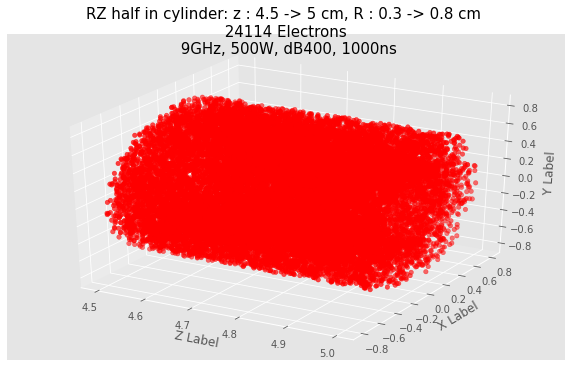

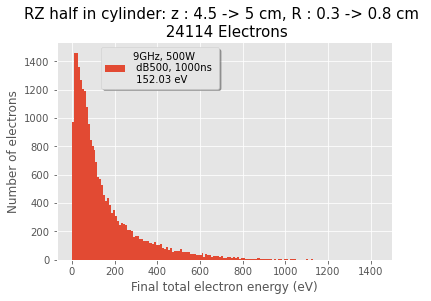

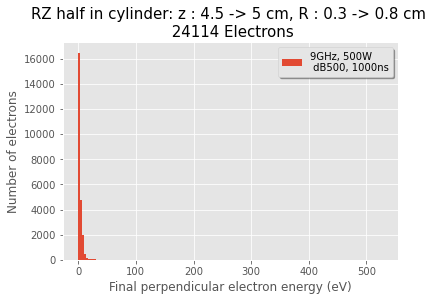

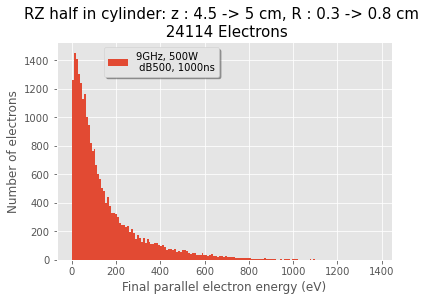

In [25]:
# RZ half cylinder: 
# z : 4.5 -> 5 cm
# R : 0.3 -> 0.8 cm

x_cube=[]
y_cube=[]
z_cube=[]
r_cube=[]
e_total_cube=[]
e_perp_cube=[]
e_par_cube=[]
time_cube=[]

for i in range(len(Z_STOP)):
    if 4.5<=Z_STOP[i]<=5 and 0.3<=R_STOP[i]<=0.8:
        x_cube.append((X_STOP[i]))
        y_cube.append((Y_STOP[i]))
        z_cube.append((Z_STOP[i]))
        r_cube.append((R_STOP[i]))
        e_total_cube.append((E_TOTAL_STOP[i]))
        e_perp_cube.append((E_PERP_STOP[i]))
        e_par_cube.append((E_PAR_STOP[i]))
        
#print(len(x_cube),len(y_cube))

#print(len(x_cube),len(y_cube))
mean = float(np.mean(e_total_cube))
#print(mean)
mean1=round(mean, 2)
#print(mean1)

fig30 = plt.figure(figsize=(10,6))
ax = fig30.add_subplot(111, projection='3d')
ax.scatter( z_cube, x_cube, y_cube, c='r', marker='o')
ax.set_xlabel('Z Label')
ax.set_ylabel('X Label')
ax.set_zlabel('Y Label')
plt.title('RZ half in cylinder: z : 4.5 -> 5 cm, R : 0.3 -> 0.8 cm \n %d Electrons \n 9GHz, 500W, dB400, 1000ns' % len(x_cube),fontsize=15)
plt.savefig('RZ half_cylinder.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_total_cube, bins =n_bins, label='9GHz, 500W \n dB500, 1000ns \n %s eV' %mean1)
plt.style.use('ggplot')
plt.xlabel('Final total electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ half in cylinder: z : 4.5 -> 5 cm, R : 0.3 -> 0.8 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.savefig('RZ half_histo.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_perp_cube, bins =n_bins, label='9GHz, 500W \n dB500, 1000ns')
plt.style.use('ggplot')
plt.xlabel('Final perpendicular electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ half in cylinder: z : 4.5 -> 5 cm, R : 0.3 -> 0.8 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(1.00, 1.00), shadow=True, ncol=2)
plt.savefig('RZ half_histo_perp.jpg')
plt.show()

n_bins=int(np.sqrt(len(e_total_cube)))
axes = plt.gca()
#axes.set_xlim([0,40])
plt.hist(e_par_cube, bins =n_bins, label='9GHz, 500W \n dB500, 1000ns')
#plt.style.use('ggplot')
plt.xlabel('Final parallel electron energy (eV)')
plt.ylabel('Number of electrons')
plt.title('RZ half in cylinder: z : 4.5 -> 5 cm, R : 0.3 -> 0.8 cm \n %d Electrons' % len(x_cube),fontsize=15)
plt.legend(loc='best', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
plt.savefig('RZ half_histo_par.jpg')
plt.show()

#print(np.mean(e_total_cube))